<style>
.rendered_html * + p, .rendered_html p {
    text-align:justify;
}
.print {
    display:none;
}
.highlight {
    background:white;
}
@media print {
 a[href]:after {
     content: ""
 }
 .noprint {
  display:none
  }
  .print {
        display:block;
    }
}
</style>
<head>
    <base target="_blank">
</head>
<div style="text-align:left"><a href="http://web.dmi.unict.it/"><img src="img/dmi.png" style="width:300px; margin:0;"></a></div>

<a href="http://iplab.dmi.unict.it/"><img src="img/iplab.png" style="width:900px"></a>
<center><h2>Machine Learning - A.A. 2020-2021</h2></center>
<center><h3>Convolutional Neural Networks</h3></center>
<br>
<center>Antonino Furnari - <a href="http://www.antoninofurnari.it/" target="_blank">http://www.antoninofurnari.it/</a> - <a href="mailto:furnari@dmi.unict.it">furnari@dmi.unict.it</a> </center>
<center>Giovanni Maria Farinella - <a href="http://www.dmi.unict.it/farinella/" target="_blank">http://www.dmi.unict.it/farinella/</a> - <a href="mailto:gfarinella@dmi.unict.it">gfarinella@dmi.unict.it</a> </center>

Le Convolutional Neural Networks (CNN) permettono di applicare le reti neural in maniera efficiente al processamento di immagini. Abbiamo già visto come sia possibile classificare immagini mediante un regressore softmax o un multilayer perceptron. Tuttavia, vista l'alta dimensionalità delle immagini, tali metodi tendono a non scalare a immagini di grandi dimensioni e a grossi dataset di immagini. Le Convolutional Neural Networks cercano di risolvere questi problemi sostituendo le transformazioni lineari con le convoluzioni, che richiedono meno parametri e presentano invarianza traslazionale. 

**NOTA**: In questo laboratorio, i modelli vengono allenati per 50/150 epoche. Questi parametri richiedono lunghi tempi di allenamento. Ai fini del completamento del laboratorio in aula, si consiglia di allenare i modelli solo per qualche epoca (a fini didattici) e di ripetere tutti gli addestramenti una volta a casa (il processo richiederà delle ore).

## 1 LeNet
Iniziamo implementando un modello molto simile a LeNet-5, il primo esempio di CNN presente in letteratura (LeCunn et al. 1998). Il modello è stato proposto nel 1998 per risolvere il problema della classificazione di cifre del dataset MNIST-DIGITS. Il modello qui presentato differisce da quello originale in diversi dettagli, ma la sua struttura resta fedele all'originale. Il modello prevede sette layers:

 * Un layer di convoluzione C1. Il layer prende in input una immagine di dimensione $28 \times 28$ pixels e un unico canale. Mediante l'applicazione di $6$ kernel di convoluzione di dimensioni $5 \times 5$, vengono calcolate $6$ mappe di features. Nessun tipo di padding viene applicato, dunque ogni mappa di features ha dimensioni $24 \times 24$. In pratica, l'input del layer C1 è un tensore di dimensione $1 \times 28 \times 28$, mentre il suo output è un tensore di dimensione $6 \times 24 \times 24$. Ogni convoluzione viene effettuata applicando un kernel di dimensione $5 \times 5$ e sommando al risultato un termine di bias. Il numero totale di parametri ottimizzabili del livello C1 è dunque pari a $6 \cdot (5 \cdot 5 +1) = 156$;
 * Un layer di sottocampionamento S2. Il layer prende in input le 6 mappe $24 \times 24$ e le sottocampiona ottenendo in output mappe di dimensioni $12 \times 12$. Il sottocampionamento è effettuato suddividendo la mappa in input in intorni $2 \times 2$ e calcolando il valore medio di ognuno di questi intorni (average pooling); In pratica, l'input del layer è un tensore di dimensione $6 \times 24 \times 24$, mentre il suo output è un tensore di dimensione $6 \times 12 \times 12$. Il layer non contiene alcun parametro ottimizzabile;
 * Un layer di convoluzione C3. Il layer prende in input il tensore di dimensioni $6 \times 12 \times 12$ e calcola $16$ mappe di feature di dimensioni $8 \times 8$ utilizzando kernel di dimensioni $5 \times 5$. Il numero di parametri ottimizzabili è pari a $6 \times 5 \times 5 \times 16 + 16= 2416$;
 * Un layer di sottocampionamento S4. In maniera del tutto simile al layer S2, prende in input $16$ mappe di dimensione $8 \times 8$ e produce $16$ mappe di dimensione $4 \times 4$. Anche questo livello non contiene parametri ottimizzabili;
 * Un layer di trasformazione lineare "fully connected" F5. Il layer prende in input il tensore di dimensioni $16 \times 4 \times 4$. Il tensore viene dunque considerato come un vettore monodimensionale di $256$ unità e trasformato (mediante trasformazione lineare) in un tensore di $120$ unità. Il numero totale di parametri è dato da $120 \cdot 256 + 120 = 30840$ (l'ultimo "+120" rappresenta i parametri di bias);
 * Un layer di trasformazione lineare F6. Il layer prende in input il vettore di $120$ unità e lo trasforma in un vettore di $84$ unità. Il numero di parametri ottimizzabili è pari a $84 \times 120 + 84 = 10164$;
 * Un layer di trasformazione lineare F7. Il layer prende in input il vettore di $84$ unità e lo trasforma in un vettore di $10$ unità (gli score relativi alle $10$ classi di MNIST-DIGITS). Il numero di parametri ottimizzabili del livello è pari a $84*10+10 = 850$.
 
Il numero totale di parametri del modello è pari a $44426$. Tra ogni coppia di layer, tranne che subito dopo i layer di sottocampionamento, è presente una attivazione di tipo TanH. la figura mostra uno schema del modello LeNet considerato:

<center><img src ="img/lenet_mod.png"></center>

**Domanda 1**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Perchè i layer di convoluzione (C1, C3) riducono le dimensioni delle mappe in input? Secondo quale formula le dimensioni vengono ridotte?

**Risposta 1**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

**Domanda 2**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si confronti il numero di parametri di LeNet con quelli di un multilayer perceptron con $64$ unità nascoste. Quale dei due modelli contiene meno parametri? A cosa è dovuta la differenza?

**Risposta 2**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Prima di iniziare a scrivere del codice, impostiamo un seed:

In [1]:
import torch
import numpy as np
np.random.seed(1328)
torch.random.manual_seed(1328);

Implementiamo adesso il modello LeNet:

In [2]:
from torch import nn
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__() 
        #Definiamo il primo livello. Dobbiamo effettuare una convoluzione 2D (ovvero su immagini)
        #Utilizziamo il modulo Conv2d che prende in input:
        #  - il numero di canali in input: 1 (si tratta di immagini in scala di grigio)
        #  - il numero di canali in output: 6 (le mappe di feature)
        #  - la dimensione del kernel: 5 (sta per "5 X 5")
        self.C1 = nn.Conv2d(1, 6, 5)
        #Definiamo il livello di subsampling. Questo viene implementato usando il modulo "AvgPool2d"
        #Il modulo richiede in input la dimensione dei neighborhood rispetto ai quali calcolare
        # i valori medi: 2
        self.S2 = nn.AvgPool2d(2)
        #Definiamo il livello C3 in maniera analoga a quanto fatto per il livello C1:
        self.C3 = nn.Conv2d(6, 16, 5)
        #Definiamo il successivo max pooling 2d
        self.S4 = nn.AvgPool2d(2)
        #Definiamo il primo layer FC
        self.F5 = nn.Linear(256, 120)
        #Definiamo il secondo layer FC
        self.F6 = nn.Linear(120, 84)
        #Definiamo il terzo layer FC
        self.F7 = nn.Linear(84, 10)
        
        #Definiamo inoltre un modulo per calcolare l'attivazione Tanh
        self.activation = nn.Tanh()
        
    def forward(self,x):
        #Applichiamo le diverse trasformazioni in cascata
        x = self.C1(x)
        x = self.S2(x)
        x = self.activation(x) #inseriamo le attivazioni ove opportuno
        x = self.C3(x)
        x = self.S4(x)
        x = self.activation(x) #inseriamo le attivazioni ove opportuno
        x = self.F5(x.view(x.shape[0],-1)) #dobbiamo effettuare un "reshape" del tensore
        x = self.activation(x)
        x = self.F6(x)
        x = self.activation(x)
        x = self.F7(x)
        return x

Definiamo il modello e verifichiamone il numero di parametri:

In [3]:
net = LeNet()
sum([p.numel() for p in net.parameters()])

44426

Carichiamo il dataset MNIST-DIGITS e definiamo i loaders

In [4]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.1307,), (0.3081,))])
mnist_train = MNIST(root='mnist',train=True, download=True, transform=transform)
mnist_test = MNIST(root='mnist',train=False, download=True, transform=transform)
mnist_train_loader = DataLoader(mnist_train, batch_size=1024, num_workers=2, shuffle=True)
mnist_test_loader = DataLoader(mnist_test, batch_size=1024, num_workers=2)

Definiamo l'oggetto `AverageValueMeter` come visto nello scorso laboratorio:

In [5]:
class AverageValueMeter():
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.sum = 0
        self.num = 0
    
    def add(self, value, num):
        self.sum += value*num
        self.num += num
        
    def value(self):
        try:
            return self.sum/self.num
        except:
            return None

Definiamo la procedura di training vista nel laboratorio precedente:

In [6]:
from torch.optim import SGD
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score
from os.path import join

def train_classifier(model, train_loader, test_loader, exp_name='experiment', lr=0.01, epochs=10, momentum=0.99, logdir='logs'):
    criterion = nn.CrossEntropyLoss() 
    optimizer = SGD(model.parameters(), lr, momentum=momentum) 
    #meters
    loss_meter = AverageValueMeter()
    acc_meter = AverageValueMeter()
    #writer
    writer = SummaryWriter(join(logdir, exp_name))
    #device
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    #definiamo un dizionario contenente i loader di training e test
    loader = {
        'train' : train_loader,
        'test' : test_loader
    }
    #inizializziamo il global step
    global_step = 0
    for e in range(epochs):
        #iteriamo tra due modalità: train e test
        for mode in ['train','test']:
            loss_meter.reset(); acc_meter.reset()
            model.train() if mode == 'train' else model.eval()
            with torch.set_grad_enabled(mode=='train'): #abilitiamo i gradienti solo in training
                for i, batch in enumerate(loader[mode]):
                    x=batch[0].to(device) #"portiamoli sul device corretto"
                    y=batch[1].to(device)
                    output = model(x)
                    
                    #aggiorniamo il global_step
                    #conterrà il numero di campioni visti durante il training
                    n = x.shape[0] #numero di elementi nel batch
                    global_step += n
                    l = criterion(output,y)

                    if mode=='train':
                        l.backward()
                        optimizer.step()
                        optimizer.zero_grad()

                    acc = accuracy_score(y.to('cpu'),output.to('cpu').max(1)[1])
                    loss_meter.add(l.item(),n)
                    acc_meter.add(acc,n)

                    #loggiamo i risultati iterazione per iterazione solo durante il training
                    if mode=='train':
                        writer.add_scalar('loss/train', loss_meter.value(), global_step=global_step)
                        writer.add_scalar('accuracy/train', acc_meter.value(), global_step=global_step)
            #una volta finita l'epoca (sia nel caso di training che test, loggiamo le stime finali)
            writer.add_scalar('loss/' + mode, loss_meter.value(), global_step=global_step)
            writer.add_scalar('accuracy/' + mode, acc_meter.value(), global_step=global_step)
            
        #conserviamo i pesi del modello alla fine di un ciclo di training e test
        torch.save(model.state_dict(),'%s-%d.pth'%(exp_name,e+1))
    return model

Costruiamo e alleniamo la rete LeNet:

In [7]:
lenet_mnist = LeNet()
lenet_mnist = train_classifier(lenet_mnist, mnist_train_loader, mnist_test_loader, 'lenet_mnist', epochs = 50)

Le curve di training/test dovrebbero essere simili alle seguenti:

<center><img src='img/lenet_mnist_tb.jpg' width=80%></center>

**Domanda 3**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si osservi il log della procedura di training. Possiamo dire che la rete converge?

**Risposta 3**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Definiamo la consueta funzione per ottenere probabilità di test predette dal modello:

In [8]:
def test_classifier(model, loader):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    predictions, labels = [], []
    for batch in loader:
        x = batch[0].to(device)
        y = batch[1].to(device)
        output = model(x)
        preds = output.to('cpu').max(1)[1].numpy()
        labs = y.to('cpu').numpy()
        predictions.extend(list(preds))
        labels.extend(list(labs))
    return np.array(predictions), np.array(labels)

Calcoliamo le accuracy di training e test:

In [9]:
lenet_mnist_predictions_train, mnist_labels_train = test_classifier(lenet_mnist, mnist_train_loader)
lenet_mnist_predictions_test, mnist_labels_test = test_classifier(lenet_mnist, mnist_test_loader)
print("Accuarcy di training: %0.4f"% accuracy_score(mnist_labels_train, lenet_mnist_predictions_train))
print("Accuarcy di test: %0.4f"% accuracy_score(mnist_labels_test, lenet_mnist_predictions_test))

Accuarcy di training: 1.0000
Accuarcy di test: 0.9789


Generalmente, quando le accuracy sono così alte, le performance degli algoritmi di classificazione vengono espresse sotto forma di errore percentuale di classificazione, che può essere calcolato come segue:

In [10]:
def perc_error(gt, pred):
    return (1-accuracy_score(gt,pred))*100

Calcoliamo l'errore percentuale di LeNet:

In [11]:
print ("Errore LeNet su DIGITS: %0.2f%%" % \
    perc_error(mnist_labels_test, lenet_mnist_predictions_test))

Errore LeNet su DIGITS: 2.11%


**Domanda 4**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si confrontino le accuracy di training e test. Possiamo dire che il modello generalizza?

**Risposta 4**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Il modello di LeNet che abbiamo definito è una versione "classica" di una CNN. I progressi nel campo della ricerca hanno sottolineato che:
 * Il max pooling funziona meglio dell'average pooling;
 * Le ReLU sono più robuste delle attivazioni di tipo Tanh.
 
Costruiamo una versione "più moderna" di LeNet modificando questi due elementi:

In [12]:
class LeNetV2(nn.Module):
    def __init__(self):
        super(LeNetV2, self).__init__() 
        #Definiamo il primo livello. Dobbiamo effettuare una convoluzione 2D (ovvero su immagini)
        #Utilizziamo il modulo Conv2d che prende in input:
        #  - il numero di canali in input: 1 (si tratta di immagini in scala di grigio)
        #  - il numero di canali in output: 6 (le mappe di feature)
        #  - la dimensione del kernel: 5 (sta per "5 X 5")
        self.C1 = nn.Conv2d(1, 6, 5)
        #Definiamo il livello di subsampling. Questo viene implementato usando il modulo "MaxPool2d"
        #Il modulo richiede in input la dimensione dei neighbourhood rispetto ai quali calcolare
        # i valori massimi: 2
        self.S2 = nn.MaxPool2d(2)
        #Definiamo il livello C3 in maniera analoga a quanto fatto per il livello C1:
        self.C3 = nn.Conv2d(6, 16, 5)
        #Definiamo il successivo max pooling 2d
        self.S4 = nn.MaxPool2d(2)
        #Definiamo il primo layer FC
        self.F5 = nn.Linear(256, 120)
        #Definiamo il secondo layer FC
        self.F6 = nn.Linear(120, 84)
        #Definiamo il terzo layer FC
        self.F7 = nn.Linear(84, 10)
        
        #Definiamo inoltre un modulo per calcolare l'attivazione ReLU
        self.activation = nn.ReLU()
        
    def forward(self,x):
        #Applichiamo le diverse trasformazioni in cascata
        x = self.C1(x)
        x = self.S2(x)
        x = self.activation(x) #inseriamo le attivazioni ove opportuno
        x = self.C3(x)
        x = self.S4(x)
        x = self.activation(x) #inseriamo le attivazioni ove opportuno
        x = self.F5(x.view(x.shape[0],-1)) #dobbiamo effettuare un "reshape" del tensore
        x = self.activation(x)
        x = self.F6(x)
        x = self.activation(x)
        x = self.F7(x)
        return x

**Domanda 5**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si confronti il codice di LeNet con quello di LeNetV2. Quali righe di codice sono cambiate?

**Risposta 5**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Alleniamo il nuovo modello:

In [13]:
lenet_v2_mnist = LeNetV2()
lenet_v2_mnist = train_classifier(lenet_v2_mnist, mnist_train_loader, mnist_test_loader, 'lenet_v2_mnist', epochs=50)

Le curve di training/test dovrebbero essere simili alle seguenti:

<center><img src='img/lenet_mnist_v2_tb.jpg' width=80%></center>

**Domanda 6**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si confrontino le curve di training e test di LeNetV2 con quelle di LeNetV1. Quale dei due modelli converge prima?

**Risposta 6**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Calcoliamo l'errore di test e confrontiamolo con quello ottenuto in precedenza:

In [14]:
lenet_v2_mnist_predictions_test, mnist_labels_test = test_classifier(lenet_v2_mnist, mnist_test_loader)
print ("Errore LeNet su DIGITS: %0.2f%%" % \
    perc_error(mnist_labels_test, lenet_mnist_predictions_test))
print ("Errore LeNet v2 su DIGITS: %0.2f%%" % \
    perc_error(mnist_labels_test, lenet_v2_mnist_predictions_test))

Errore LeNet su DIGITS: 2.11%
Errore LeNet v2 su DIGITS: 1.19%


## 2 Immagini Naturali e "MiniAlexNet"

Consideriamo adesso due dataset più complessi: CIFAR-100 e CIFAR-10. Ciascuno dei due dataset consiste in $60000$ immagini a colori di dimensioni $32 \times 32$. $50000$ immagini sono utilizzate per training, mentre le restanti $10000$ immagini sono utilizzate per test. Le immagini di CIFAR-100 sono suddivise in $100$ classi, mentre le immagini di CIFAR-10 sono suddivise in 10 classi. L'immagine che segue mostra alcuni esempi delle $10$ classi di CIFAR-10:

<img src = "img/cifar.png" width=600px>

Carichiamo il dataset CIFAR-100. Normalizzeremo le immagini utilizzando le medie e varianze per canale, che sono state pre-computate (si vedano gli scorsi laboratori per un esempio su come calcolare questi valori).

In [15]:
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
cifar100_train = CIFAR100(root='cifar100',train=True, download=True, transform=transform)
cifar100_test = CIFAR100(root='cifar100',train=False, download=True, transform=transform)
cifar100_train_loader = DataLoader(cifar100_train, batch_size=1024, num_workers=2, shuffle=True)
cifar100_test_loader = DataLoader(cifar100_test, batch_size=1024, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


Adattiamo il modello LeNetV2 per prendere in input immagini a 3 canali (RGB) di dimensione $32 \times 32$ (invece di $28 \times 28$). Aumenteremo il numero di feature maps e unità nei layer fully connected per aumentare la capacità della rete. Sostituiremo inoltre l'average Pooling con il MaxPooling e le attivazioni Tanh con le ReLU.

In [16]:
from torch import nn
class LeNetColor(nn.Module):
    def __init__(self):
        super(LeNetColor, self).__init__() 
        #ridefiniamo il modello utilizzando i moduli sequential.
        #ne definiamo due: un "feature extractor", che estrae le feature maps
        #e un "classificatore" che implementa i livelly FC
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 18, 5), #Input: 3 x 32 x 32. Ouput: 18 x 28 x 28
            nn.MaxPool2d(2), #Input: 18 x 28 x 28. Output: 18 x 14 x 14
            nn.ReLU(),
            nn.Conv2d(18, 28, 5), #Input 18 x 14 x 14. Output: 28 x 10 x 10
            nn.MaxPool2d(2), #Input 28 x 10 x 10. Output: 28 x 5 x 5
            nn.ReLU()
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(700, 360), #Input: 28 * 5 * 5
            nn.ReLU(),
            nn.Linear(360, 252),
            nn.ReLU(),
            nn.Linear(252, 100)
        )
        
        
    def forward(self,x):
        #Applichiamo le diverse trasformazioni in cascata
        x = self.feature_extractor(x)
        x = self.classifier(x.view(x.shape[0],-1))
        return x

**Domanda 7**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Confrontare il codice di LeNetColor con quello di LeNetV2. Le dimensioni delle mappe intermedie sono cambiate? Perchè?

**Risposta 7**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Alleniamo il modello:

In [17]:
lenet_cifar100 = LeNetColor()
lenet_cifar100 = train_classifier(lenet_cifar100, cifar100_train_loader, cifar100_test_loader, \
                                  'lenet_cifar100', epochs=150)

Le curve di training/test dovrebbero essere simili alle seguenti:

<center><img src='img/lenet_cifar100_tb.jpg' width=80%></center>

**Domanda 8**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Possiamo dire che la rete converge? Perchè? Come mai la differenza tra accuracy di training e accuracy di test aumenta all'aumentare del numero di epoche?

**Risposta 8**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Calcoliamo l'accuracy di test:

In [18]:
lenet_cifar100_test_predictions, cifar100_labels_test = test_classifier(lenet_cifar100, cifar100_test_loader)
print("Accuracy LeNetColor su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,lenet_cifar100_test_predictions))

Accuracy LeNetColor su CIFAR-100: 0.24


L'accuracy è piuttosto bassa. Proviamo a migliorarla aumentando la capacità del modello. Definiamo un modello più "profondo" con 5 livelli di convoluzione e tre layer fully connected. Inseriremo il max pooling solo tra il primo e secondo livello, il secondo e il terzo, e il quinto e il sesto. Per evitare l'eccessiva riduzione di dimensioni delle mappe di features, specifichiamo un padding pari al ceil della dimensione del kernel fratto 2. Questo farà sì che le convoluzioni non riducano le dimensioni delle mappe di features. Utilizziamo kernel di dimensioni più grandi nei primi layer e più piccoli nei layer successivi. Il modello è vagamente ispirato al modello "AlexNet" proposto da Krizhevsky et al. nel 2013.

In [19]:
from torch import nn
class MiniAlexNet(nn.Module):
    def __init__(self, input_channels=3, out_classes=100):
        super(MiniAlexNet, self).__init__() 
        #ridefiniamo il modello utilizzando i moduli sequential.
        #ne definiamo due: un "feature extractor", che estrae le feature maps
        #e un "classificatore" che implementa i livelly FC
        self.feature_extractor = nn.Sequential(
            #Conv1
            nn.Conv2d(input_channels, 16, 5, padding=2), #Input: 3 x 32 x 32. Ouput: 16 x 32 x 32
            nn.MaxPool2d(2), #Input: 16 x 32 x 32. Output: 16 x 16 x 16
            nn.ReLU(),
            
            #Conv2
            nn.Conv2d(16, 32, 5, padding=2), #Input 16 x 16 x 16. Output: 32 x 16 x 16
            nn.MaxPool2d(2), #Input: 32 x 16 x 16. Output: 32 x 8 x 8
            nn.ReLU(),
            
            #Conv3
            nn.Conv2d(32, 64, 3, padding=1), #Input 32 x 8 x 8. Output: 64 x 8 x 8
            nn.ReLU(),
            
            #Conv4
            nn.Conv2d(64, 128, 3, padding=1), #Input 64 x 8 x 8. Output: 128 x 8 x 8
            nn.ReLU(),
            
            #Conv5
            nn.Conv2d(128, 256, 3, padding=1), #Input 128 x 8 x 8. Output: 256 x 8 x 8
            nn.MaxPool2d(2), #Input: 256 x 8 x 8. Output: 256 x 4 x 4
            nn.ReLU()
        )
        
        self.classifier = nn.Sequential(
            #FC6
            nn.Linear(4096, 2048), #Input: 256 * 4 * 4
            nn.ReLU(),
            
            #FC7
            nn.Linear(2048, 1024),
            nn.ReLU(),
            
            #FC8
            nn.Linear(1024, out_classes)
        )
        
        
    def forward(self,x):
        #Applichiamo le diverse trasformazioni in cascata
        x = self.feature_extractor(x)
        x = self.classifier(x.view(x.shape[0],-1))
        return x

Alleniamo il modello:

In [20]:
mini_alexnet_cifar100 = MiniAlexNet()
mini_alexnet_cifar100 = train_classifier(mini_alexnet_cifar100, cifar100_train_loader, cifar100_test_loader, \
                                  'minialexnet_cifar100', epochs=150)

Le curve di training/test dovrebbero essere simili alle seguenti:

<center><img src='img/mini_alexnet_cifar100_tb.jpg' width=80%></center>

Calcoliamo l'accuracy di test e confrontiamola con quella del precedente modello:

In [21]:
minialexnet_cifar100_test_predictions, cifar100_labels_test = test_classifier(mini_alexnet_cifar100, cifar100_test_loader)
print("Accuracy LeNetColor su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,lenet_cifar100_test_predictions))
print("Accuracy MiniAlexNet su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,minialexnet_cifar100_test_predictions))

Accuracy LeNetColor su CIFAR-100: 0.24
Accuracy MiniAlexNet su CIFAR-100: 0.21


**Domanda 9**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Confrontare le curve di loss e accuracy di MiniAlexNet con quelle di LeNetColor. Quale dei due modelli soffre di più di overfitting. Perché?

**Risposta 9**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

# 3 Regolarizzazione

Negli esempi precedenti, abbiamo osservato una grossa differenza tra accuracy di training e accuracy di test. Questa differenza è dovuta al fenomeno dell'overfitting e si acuisce quando i modelli contengono molti parametri e i dataset sono piccoli. Oltre alla tecnica di regolarizzazione mediante weight decay, esistono altre tecniche per ridurre l'overfitting. Vedremo in particolare le seguenti tecniche:
 * Dropout;
 * Data augmentation;
 * Batch normalization.

## 3.1 Dropout

Il dropout permette di ridurre l'overfitting rimuovendo in maniera casuale dei nodi dalla rete a training time. Per implementare il dropout, basta utilizzare il modulo apposito `Dropout`. Modifichiamo MiniAlexNet per introdurre il dropout nei layer fully connected. Posizioneremo i moduli dropout esattamente dove sono posizionali nell'architettura AlexNet. Come probabilità di dropout utilizzeremo $0.5$, che è la probabilità di default.

In [22]:
from torch import nn
class MiniAlexNetV2(nn.Module):
    def __init__(self, input_channels=3, out_classes=100):
        super(MiniAlexNetV2, self).__init__() 
        #ridefiniamo il modello utilizzando i moduli sequential.
        #ne definiamo due: un "feature extractor", che estrae le feature maps
        #e un "classificatore" che implementa i livelly FC
        self.feature_extractor = nn.Sequential(
            #Conv1
            nn.Conv2d(input_channels, 16, 5, padding=2), #Input: 3 x 32 x 32. Ouput: 16 x 32 x 32
            nn.MaxPool2d(2), #Input: 16 x 32 x 32. Output: 16 x 16 x 16
            nn.ReLU(),
            
            #Conv2
            nn.Conv2d(16, 32, 5, padding=2), #Input 16 x 16 x 16. Output: 32 x 16 x 16
            nn.MaxPool2d(2), #Input: 32 x 16 x 16. Output: 32 x 8 x 8
            nn.ReLU(),
            
            #Conv3
            nn.Conv2d(32, 64, 3, padding=1), #Input 32 x 8 x 8. Output: 64 x 8 x 8
            nn.ReLU(),
            
            #Conv4
            nn.Conv2d(64, 128, 3, padding=1), #Input 64 x 8 x 8. Output: 128 x 8 x 8
            nn.ReLU(),
            
            #Conv5
            nn.Conv2d(128, 256, 3, padding=1), #Input 128 x 8 x 8. Output: 256 x 8 x 8
            nn.MaxPool2d(2), #Input: 256 x 8 x 8. Output: 256 x 4 x 4
            nn.ReLU()
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(), #i layer di dropout vanno posizionati prima di FC6 e FC7
            #FC6
            nn.Linear(4096, 2048), #Input: 256 * 4 * 4
            nn.ReLU(),
            
            nn.Dropout(),
            #FC7
            nn.Linear(2048, 1024),
            nn.ReLU(),
            
            #FC8
            nn.Linear(1024, out_classes)
        )
        
        
    def forward(self,x):
        #Applichiamo le diverse trasformazioni in cascata
        x = self.feature_extractor(x)
        x = self.classifier(x.view(x.shape[0],-1))
        return x

Alleniamo il modello su CIFAR-100:

In [23]:
mini_alexnet_v2_cifar100 = MiniAlexNetV2()
mini_alexnet_v2_cifar100 = train_classifier(mini_alexnet_v2_cifar100, cifar100_train_loader, cifar100_test_loader, \
                                  'minialexnet_v2_cifar100', epochs=150)

Le curve di training/test dovrebbero essere simili alle seguenti:

<center><img src='img/mini_alexnet_v2_cifar100_tb.jpg' width=80%></center>

Calcoliamo l'accuracy di test e confrontiamo con i modelli precedenti:

In [24]:
minialexnet_v2_cifar100_test_predictions, cifar100_labels_test = test_classifier(mini_alexnet_v2_cifar100, cifar100_test_loader)
print("Accuracy LeNetColor su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,lenet_cifar100_test_predictions))
print("Accuracy MiniAlexNet su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,minialexnet_cifar100_test_predictions))
print("Accuracy MiniAlexNetV2 su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,minialexnet_v2_cifar100_test_predictions))

Accuracy LeNetColor su CIFAR-100: 0.24
Accuracy MiniAlexNet su CIFAR-100: 0.21
Accuracy MiniAlexNetV2 su CIFAR-100: 0.40


**Domanda 10**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Il dropout ha migliorato notevolmente l'accuracy di test. Si può anche notare una differenza qualitativa nel training dei due modelli (con e senza dropout). Si confrontino le curve di accuracy e loss del modello appena allenato e della rispettiva versione senza dropout. Quali sono le differenze?

**Risposta 10**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

## 3.2 Data Augmentation

Un altro modo per prevenire l'overfitting, consiste nell'"aumentare" i dati in maniera sintetica. Ciò permette di forzare il modello a generalizzare rispetto ad alcune condizioni. La tecnica della data augmentation viene applicata trasformando "al volo" i dati in input in maniera casuale e facendo in modo che, dopo la trasformazione, l'etichetta sia ancora valida. Alcune trasformazioni comuni sono le seguenti:

 * Flip orizzontale, con probabilità 0.5;
 * Color jittering: il valore di ogni pixel viene perturbato leggermente in maniera casuale;
 * Random crop: un crop di dimensione inferiore a quella di input viene estratto casualmente dall'immagine.

Applicando la data augmentation, ad ogni epoca, il training set sarà "leggermente diverso". Ciò permette di ridurre l'overfitting. La data augmentation si applica specificando apposite trasformazioni. Le trasformazioni vengono applicate solo in fase di training.

Vediamo di applicare le tre trasformazioni viste sopra. Estrarremo crop $28 \times 28$ dalle immagini $32 \times 32$ di CIFAR-10. Ciò ci costringerà ad adattare la struttura di MiniAlexNet per accettare in input immagini più piccole. Per compatibilità, in fase di test estrarremo crop $28 \times 28$ dalla parte centrale dell'immagine.

In [25]:
from torch.utils.data import DataLoader
from torchvision import transforms

transform_train = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.ColorJitter(),
                                      transforms.RandomCrop(28),
                                      transforms.ToTensor(), 
                                      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

#in fase di test specifichiamo solo il crop centrale (non potremmo classificare immagini 32 x 32)
transform_test = transforms.Compose([ transforms.CenterCrop(28),
                                      transforms.ToTensor(), 
                                      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])


cifar100_train = CIFAR100(root='cifar100',train=True, download=True, transform=transform_train)
cifar100_test = CIFAR100(root='cifar100',train=False, download=True, transform=transform_test)
cifar100_train_loader = DataLoader(cifar100_train, batch_size=1024, num_workers=2, shuffle=True)
cifar100_test_loader = DataLoader(cifar100_test, batch_size=1024, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


Per capire l'effetto della data augmentation, proviamo a caricare e mostrare a schermo la stessa immagine del training set più volte:

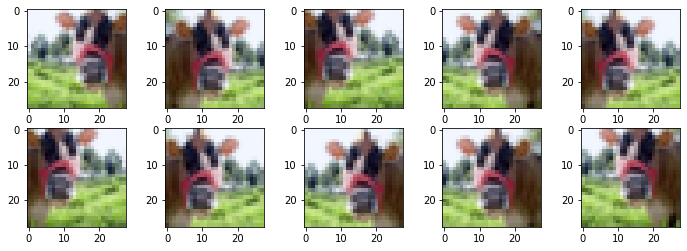

In [26]:
from matplotlib import pyplot as plt
#riscaliamo i valori tra 0 e 1 per la visualizzazione
def norm(im):
    im = im-im.min()
    return im/im.max()

plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(norm(cifar100_train[0][0].numpy().transpose(1,2,0)))
plt.show()

Come possiamo notare, ogni volta che lo stesso campione viene caricato, vengono applicate ad esso trasformazioni diverse.

**Domanda 11**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Quali sono i vantaggi del processo di data augmentation appena descritto rispetto ad applicare le trasformazioni considerate a tutte le immagini di training per ottenere una versione aumentata del dataset da conservare in memoria?

**Risposta 11**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Adattiamo adesso MiniAlexNet per lavorare su immagini $28 \times 28$:

In [27]:
from torch import nn
class MiniAlexNetV3(nn.Module):
    def __init__(self, input_channels=3, out_classes=100):
        super(MiniAlexNetV3, self).__init__() 
        #ridefiniamo il modello utilizzando i moduli sequential.
        #ne definiamo due: un "feature extractor", che estrae le feature maps
        #e un "classificatore" che implementa i livelly FC
        self.feature_extractor = nn.Sequential(
            #Conv1
            nn.Conv2d(input_channels, 16, 5, padding=2), #Input: 3 x 28 x 28. Ouput: 16 x 28 x 28
            nn.MaxPool2d(2), #Input: 16 x 28 x 28. Output: 16 x 14 x 14
            nn.ReLU(),
            
            #Conv2
            nn.Conv2d(16, 32, 5, padding=2), #Input 16 x 14 x 14. Output: 32 x 14 x 14
            nn.MaxPool2d(2), #Input: 32 x 14 x 14. Output: 32 x 7 x 7
            nn.ReLU(),
            
            #Conv3
            nn.Conv2d(32, 64, 3, padding=1), #Input 32 x 7 x 7. Output: 64 x 7 x 7
            nn.ReLU(),
            
            #Conv4
            nn.Conv2d(64, 128, 3, padding=1), #Input 64 x 7 x 7. Output: 128 x 7 x 7
            nn.ReLU(),
            
            #Conv5
            nn.Conv2d(128, 256, 3, padding=1), #Input 128 x 7 x 7. Output: 256 x 7 x 7
            nn.MaxPool2d(2), #Input: 256 x 7 x 7. Output: 256 x 3 x 3
            nn.ReLU()
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(), #i layer di dropout vanno posizionati prima di FC6 e FC7
            #FC6
            nn.Linear(2304, 2048), #Input: 256 * 3 * 3
            nn.ReLU(),
            
            nn.Dropout(),
            #FC7
            nn.Linear(2048, 1024),
            nn.ReLU(),
            
            #FC8
            nn.Linear(1024, out_classes)
        )
        
        
    def forward(self,x):
        #Applichiamo le diverse trasformazioni in cascata
        x = self.feature_extractor(x)
        x = self.classifier(x.view(x.shape[0],-1))
        return x

**Domanda 12**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Cosa è stato modificato nel modello? Perché?

**Risposta 12**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Alleniamo il modello:

In [28]:
mini_alexnet_v3_cifar100 = MiniAlexNetV3()
mini_alexnet_v3_cifar100 = train_classifier(mini_alexnet_v3_cifar100, cifar100_train_loader, cifar100_test_loader, \
                                  'minialexnet_v3_cifar100', epochs=150)

Le curve di training/test dovrebbero essere simili alle seguenti:

<center><img src='img/mini_alexnet_v3_cifar100_tb2.jpg' width=80%></center>

Calcoliamo l'accuracy di test e confrontiamo con gli altri modelli:

In [29]:
minialexnet_v3_cifar100_test_predictions, cifar100_labels_test = test_classifier(mini_alexnet_v3_cifar100, cifar100_test_loader)
print("Accuracy LeNetColor su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,lenet_cifar100_test_predictions))
print("Accuracy MiniAlexNet su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,minialexnet_cifar100_test_predictions))
print("Accuracy MiniAlexNetV2 su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,minialexnet_v2_cifar100_test_predictions))
print("Accuracy MiniAlexNetV3 su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,minialexnet_v3_cifar100_test_predictions))

Accuracy LeNetColor su CIFAR-100: 0.24
Accuracy MiniAlexNet su CIFAR-100: 0.21
Accuracy MiniAlexNetV2 su CIFAR-100: 0.40
Accuracy MiniAlexNetV3 su CIFAR-100: 0.49


## 3.4 Batch Normalization
Un'altra tecnica che permette di regolarizzare il modello è quella della batch normalization. La batch normalization permette di ridurre la varianza delle attivazioni dei layer intermedi della rete e può essere applicata inserendo nell'architettura il layer `nn.BatchNorm2d` nel caso di layer di convoluzioni e `nn.BatchNorm1d` nel caso di layer fully connected. I liveli di batch normalization vanno inseriti prima di ogni layer eccetto il primo. Modifichiamo AlexNetV4 introducendo la batch normalization:

In [30]:
from torch import nn
class MiniAlexNetV4(nn.Module):
    def __init__(self, input_channels=3, out_classes=100):
        super(MiniAlexNetV4, self).__init__() 
        #ridefiniamo il modello utilizzando i moduli sequential.
        #ne definiamo due: un "feature extractor", che estrae le feature maps
        #e un "classificatore" che implementa i livelly FC
        self.feature_extractor = nn.Sequential(
            #Conv1
            nn.Conv2d(input_channels, 16, 5, padding=2), #Input: 3 x 28 x 28. Ouput: 16 x 28 x 28
            nn.MaxPool2d(2), #Input: 16 x 28 x 28. Output: 16 x 14 x 14
            nn.ReLU(),
            
            #Conv2
            nn.BatchNorm2d(16), #dobbiamo passare come parametro il numero di mappe di feature in input
            nn.Conv2d(16, 32, 5, padding=2), #Input 16 x 14 x 14. Output: 32 x 14 x 14
            nn.MaxPool2d(2), #Input: 32 x 14 x 14. Output: 32 x 7 x 7
            nn.ReLU(),
            
            #Conv3
            nn.BatchNorm2d(32), #dobbiamo passare come parametro il numero di mappe di feature in input
            nn.Conv2d(32, 64, 3, padding=1), #Input 32 x 7 x 7. Output: 64 x 7 x 7
            nn.ReLU(),
            
            #Conv4
            nn.BatchNorm2d(64), #dobbiamo passare come parametro il numero di mappe di feature in input
            nn.Conv2d(64, 128, 3, padding=1), #Input 64 x 7 x 7. Output: 128 x 7 x 7
            nn.ReLU(),
            
            #Conv5
            nn.BatchNorm2d(128), #dobbiamo passare come parametro il numero di mappe di feature in input
            nn.Conv2d(128, 256, 3, padding=1), #Input 128 x 7 x 7. Output: 256 x 7 x 7
            nn.MaxPool2d(2), #Input: 256 x 7 x 7. Output: 256 x 3 x 3
            nn.ReLU()
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(), #i layer di dropout vanno posizionati prima di FC6 e FC7
            #FC6
            nn.BatchNorm1d(2304), #dobbiamo passare come parametro il numero di feature in input
            nn.Linear(2304, 2048), #Input: 256 * 3 * 3
            nn.ReLU(),
            
            nn.Dropout(),
            #FC7
            nn.BatchNorm1d(2048), #dobbiamo passare come parametro il numero di mappe di feature in input
            nn.Linear(2048, 1024),
            nn.ReLU(),
            
            #FC8
            nn.BatchNorm1d(1024), #dobbiamo passare come parametro il numero di mappe di feature in input
            nn.Linear(1024, out_classes)
        )
        
        
    def forward(self,x):
        #Applichiamo le diverse trasformazioni in cascata
        x = self.feature_extractor(x)
        x = self.classifier(x.view(x.shape[0],-1))
        return x

**Domanda 13**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si confronti il codice scritto sopra con quello di AlexNetv3, cosa cambia? Perché non viene applicata la batch normalizzation al primo layer?

**Risposta 13**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Alleniamo il modello:

In [31]:
mini_alexnet_v4_cifar100 = MiniAlexNetV4()
mini_alexnet_v4_cifar100 = train_classifier(mini_alexnet_v4_cifar100, cifar100_train_loader, cifar100_test_loader, \
                                  'minialexnet_v4_cifar100', epochs=150)

Le curve di training/test dovrebbero essere simili alle seguenti:

<center><img src='img/mini_alexnet_v4_cifar100_tb.jpg' width=80%></center>

Confrontiamo l'accuracy di test con quella degli altri modelli:

In [32]:
minialexnet_v4_cifar100_test_predictions, cifar100_labels_test = test_classifier(mini_alexnet_v4_cifar100, cifar100_test_loader)
print("Accuracy LeNetColor su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,lenet_cifar100_test_predictions))
print("Accuracy MiniAlexNet su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,minialexnet_cifar100_test_predictions))
print("Accuracy MiniAlexNetV2 su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,minialexnet_v2_cifar100_test_predictions))
print("Accuracy MiniAlexNetV3 su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,minialexnet_v3_cifar100_test_predictions))
print("Accuracy MiniAlexNetV4 su CIFAR-100: %0.2f" % \
    accuracy_score(cifar100_labels_test,minialexnet_v4_cifar100_test_predictions))

Accuracy LeNetColor su CIFAR-100: 0.24
Accuracy MiniAlexNet su CIFAR-100: 0.21
Accuracy MiniAlexNetV2 su CIFAR-100: 0.40
Accuracy MiniAlexNetV3 su CIFAR-100: 0.49
Accuracy MiniAlexNetV4 su CIFAR-100: 0.59


**Domanda 14**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si confrontino le curve di test di MiniAlexNetV3 con quelle di MiniAlexNetV4. Ci sono delle differenze significative? Quali?

**Risposta 14**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

# 4 Transfer Learning

Uno dei vantaggi delle reti neurali è che, una volta allenate per risolvere un dato problema, esse possono essere riutilizzate per risolvere nuovi task mediante la tecnica del "fine-tuning". Ciò consiste semplicemente nell'inizializzare i parametri del modello con quelli provenienti da un modello allenato per un task diverso. Consideriamo ad esempio il dataset CIFAR-10. Esso è un sottoinsieme di CIFAR-100, che contiene etichette per 10 classi invece di 100. Compareremo le performance di un modello MiniAlexNet allenato da zero con il modello MiniAlexNet pre-allenato su CIFAR-100. Carichiamo il dataset:

In [33]:
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms

transform_train = transforms.Compose([transforms.RandomVerticalFlip(),
                                      transforms.ColorJitter(),
                                      transforms.RandomCrop(28),
                                      transforms.ToTensor(), 
                                      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

#in fase di test specifichiamo solo il crop centrale (non potremmo classificare immagini 32 x 32)
transform_test = transforms.Compose([ transforms.CenterCrop(28),
                                      transforms.ToTensor(), 
                                      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

cifar10_train = CIFAR10(root='cifar10',train=True, download=True, transform=transform_train)
cifar10_test = CIFAR10(root='cifar10',train=False, download=True, transform=transform_test)
cifar10_train_loader = DataLoader(cifar10_train, batch_size=1024, num_workers=2, shuffle=True)
cifar10_test_loader = DataLoader(cifar10_test, batch_size=1024, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


Alleniamo il modello da zero:

In [34]:
mini_alexnet_v4_cifar10 = MiniAlexNetV4()
mini_alexnet_v4_cifar10 = train_classifier(mini_alexnet_v4_cifar10, cifar10_train_loader, cifar10_test_loader, \
                                  'minialexnet_v4_cifar10', epochs=150)

Le curve di training/test dovrebbero essere simili alle seguenti:

<center><img src='img/mini_alexnet_v4_cifar10_tb.jpg' width=80%></center>

Calcoliamo l'accuracy di test:

In [35]:
minialexnet_v4_cifar10_test_predictions, cifar10_labels_test = test_classifier(mini_alexnet_v4_cifar10, cifar10_test_loader)
print("Accuracy MiniAlexNetV4 su CIFAR-10: %0.2f" % \
    accuracy_score(cifar10_labels_test,minialexnet_v4_cifar10_test_predictions))

Accuracy MiniAlexNetV4 su CIFAR-10: 0.81


Vediamo adesso come adattare il modello già allenato su CIFAR-100 per CIFAR-10. Visualizziamo il modello:

In [36]:
mini_alexnet_v4_cifar10

MiniAlexNetV4(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1,

L'input del modello è sempre costituito da immagini $32 \times 32$. L'output però è pari a $100$ classi per il modello di partenza, mentre CIFAR-10 contiene $10$ classi. Dobbiamo adattare il modello per il nuovo task. Per farlo, conserveremo tutti i layer tranne l'ultimo, che verrà distrutto e ricreato. Facciamo una copia del modello:

In [37]:
from copy import deepcopy
mini_alexnet_v4_cifar100_cifar10 = deepcopy(mini_alexnet_v4_cifar100)

Accediamo al modulo sequential "classifier":

In [38]:
classifier = mini_alexnet_v4_cifar100_cifar10.classifier
classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): BatchNorm1d(2304, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Linear(in_features=2304, out_features=2048, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.5, inplace=False)
  (5): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=2048, out_features=1024, bias=True)
  (7): ReLU()
  (8): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Linear(in_features=1024, out_features=100, bias=True)
)

Estraiamo i moduli contenuti in "classifier" in una lista:

In [39]:
classifier_mods = list(classifier)
classifier_mods

[Dropout(p=0.5, inplace=False),
 BatchNorm1d(2304, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=2304, out_features=2048, bias=True),
 ReLU(),
 Dropout(p=0.5, inplace=False),
 BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=2048, out_features=1024, bias=True),
 ReLU(),
 BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=1024, out_features=100, bias=True)]

Rimuoviamo l'ultimo elemento della lista:

In [40]:
classifier_mods.pop()
classifier_mods

[Dropout(p=0.5, inplace=False),
 BatchNorm1d(2304, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=2304, out_features=2048, bias=True),
 ReLU(),
 Dropout(p=0.5, inplace=False),
 BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=2048, out_features=1024, bias=True),
 ReLU(),
 BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)]

Inseriamo un nuovo layer lineare per ottenere in output $10$ score:

In [41]:
classifier_mods.append(nn.Linear(1024, 10))
classifier_mods

[Dropout(p=0.5, inplace=False),
 BatchNorm1d(2304, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=2304, out_features=2048, bias=True),
 ReLU(),
 Dropout(p=0.5, inplace=False),
 BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=2048, out_features=1024, bias=True),
 ReLU(),
 BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=1024, out_features=10, bias=True)]

Adesso possiamo trasformare classifier_mods in un oggetto di tipo Sequential e inserirlo dentro il modello:

In [42]:
mini_alexnet_v4_cifar100_cifar10.classifier=nn.Sequential(*classifier_mods)
mini_alexnet_v4_cifar100_cifar10

MiniAlexNetV4(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1,

Va notato che questa operazione ha cambiato solamente l'ultimo livello, lasciando gli altri invariati. Tutti i livelli tranne il l'ultimo contengono dunque i pesi "pre-allenati" su CIFAR-100. Procediamo all'allenamento del modello:

In [43]:
mini_alexnet_v4_cifar100_cifar10 = train_classifier(mini_alexnet_v4_cifar100_cifar10, cifar10_train_loader, \
                                                    cifar10_test_loader, 'minialexnet_v4_cifar100_cifar10', epochs=150)

Le curve di training/test dovrebbero essere simili alle seguenti:

<center><img src='img/mini_alexnet_v4_cifar100_cifar10_tb.jpg' width=80%></center>

**Domanda 15**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

Si confronti la curva di training relativa al modello fine-tuned con quella relativa al modello allenato da zero. Quale dei due modelli converge prima? Perché?

**Risposta 15**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Calcoliamo l'accuracy di test e confrontiamola con quella del modello allenato da zero:

In [44]:
minialexnet_v4_cifar100_cifar10_test_predictions, cifar10_labels_test = test_classifier(mini_alexnet_v4_cifar100_cifar10,\
                                                                                        cifar10_test_loader)
print("Accuracy MiniAlexNetV4 su CIFAR-10: %0.2f" % \
    accuracy_score(cifar10_labels_test,minialexnet_v4_cifar10_test_predictions))
print("Accuracy MiniAlexNetV4 pre-allenato su CIFAR-100 e fine-tuned su CIFAR-10: %0.2f" % \
    accuracy_score(cifar10_labels_test,minialexnet_v4_cifar100_cifar10_test_predictions))

Accuracy MiniAlexNetV4 su CIFAR-10: 0.81
Accuracy MiniAlexNetV4 pre-allenato su CIFAR-100 e fine-tuned su CIFAR-10: 0.83


**Domanda 16**
<img src="img/qmark.jpg" style="width:150px; float:left;"/>

I due modelli in questo caso hanno raggiunto accuracy simili. Qual è stato il vantaggio del fine-tuning?

**Risposta 16**
<img style="float: left;width:150px;" src="img/note.png">

<div style="background-color:#efefef; margin-left:150px; border:solid 1px; border-color:#dddddd; border-radius: 3px;">
<br><br><br><br><br><br>
</div>

Pytorch mette a disposizione diversi modelli pre-allenati che possono essere utilizzati come punto di partenza per risolvere nuovi task. Una lista dei modelli è disponibile qui: <a href="https://pytorch.org/docs/master/torchvision/models.html">https://pytorch.org/docs/master/torchvision/models.html</a>. I modelli sono stati pre-allenati su ImageNet, un dataset contente milioni di immagini suddivise in 1000 categorie. Nei prossimi laboratori vedremo più in dettaglio come effettuare fine-tuning a partire da questi modelli.

# Esercizi
<img src="img/code.png" style="width:150px; margin-right:30px; float:left">

**Esercizio 1**

I dataset visti in questo laboratorio sono piuttosto "semplici", per cui risulta difficile apprezzare le differenze che si hanno con l'introduzione delle diverse tecniche di regolarizzazione. Si alleni un modello simile a MiniAlexNet per classificare il dataset 8Scenes visto negli scorsi laboratori. Il modello deve prendere in input immagini di dimensioni $224 \times 224$, estratte dalla parte centrale delle immagini del dataset (si utilizzi la trasformazione "CenterCrop"). Si considerino diverse versioni del modello con e senza dropout e con e senza batch normalization. Quale dei due modelli ottiene risultati migliori?

<img src="img/code.png" style="width:150px; margin-right:30px; float:left">

**Esercizio 2**

Si estenda l'esercizio 1 introducendo le tecniche di data augmentation viste in questo laboratorio. I risultati migliorano?

<img src="img/code.png" style="width:150px; margin-right:30px; float:left">

**Esercizio 3**

Si carichi il modello AlexNet specificando il flag "pretrained=True" (vedere documentazione - https://pytorch.org/docs/master/torchvision/models.html). Si modifichi il modello per risolvere il task di classificazione sul dataset 8Scenes. Si esegua il fine-tuning del modello. Il modello ottiene risultati migliori rispetto al modello allenato da zero?

# References

 * Documentazione di PyTorch. http://pytorch.org/docs/stable/index.html